In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/
https://stackoverflow.com/questions/55921286/should-i-balance-the-test-set-when-i-have-highly-unbalanced-data


In [6]:
df = pd.read_csv("../../data/raw/creditcard.csv")
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape (-1,1))
df = df.drop(['Time', 'Amount'], axis = 1)

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Distribution of Target class

In [7]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Preparing data for Training

In [8]:
X = df[df.columns.difference(["Class","Time"])]
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1234)

Feature Scaling

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
def fit_and_predict(model, X_train, y_train, X_test, y_test,desc=""):
    model = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test,prediction)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size=10)

    plt.xlabel('Predictions', fontsize=10)
    plt.ylabel('Actuals', fontsize=10)
    plt.title('Confusion Matrix', fontsize=10)
    plt.show()

    print(f'Accuracy: {accuracy_score(y_test, prediction):.3f}'  )
    print(f'Precision: {precision_score(y_test, prediction):.3f}'  )
    print(f'Recall: {recall_score(y_test,prediction):.3f}')
    print(f'F1: {f1_score(y_test,prediction):.3f}')

Training the Algorithm

In [11]:
NUM_ESTIMATOR = 50

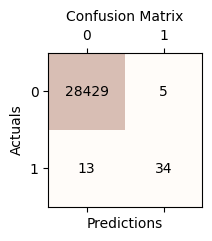

Accuracy: 0.999
Precision: 0.872
Recall: 0.723
F1: 0.791
CPU times: user 1min 18s, sys: 277 ms, total: 1min 18s
Wall time: 1min 19s


In [12]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train, y_train, X_test, y_test,desc="")

# Handling imbalance Data

In [13]:
print(f"The number of records in the training dataset is {X_train.shape}")
print(f"The number of records in the test dataset is {X_test.shape}")
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is (256326, 29)
The number of records in the test dataset is (28481, 29)
The training dataset has 255881 records for the majority class and 445 records for the minority class.


 ### Random Oversampling for Imbalanced Dataset

In [14]:
ros = RandomOverSampler(random_state=1234)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))
print("After random oversampling, the minority category increased")

[(0, 255881), (1, 255881)]
After random oversampling, the minority category increased


Training

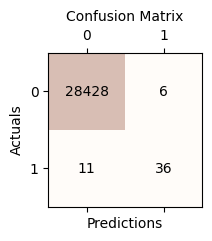

Accuracy: 0.999
Precision: 0.857
Recall: 0.766
F1: 0.809
CPU times: user 1min 8s, sys: 265 ms, total: 1min 8s
Wall time: 1min 8s


In [15]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train_ros, y_train_ros, X_test, y_test,desc="")
s

### SMOTE Oversampling for Imbalanced Dataset

In [16]:
# Randomly over sample the minority class
smote = SMOTE(random_state=1234)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))
print("Similar to random oversampling, the minority category increased")

[(0, 255881), (1, 255881)]
Similar to random oversampling, the minority category increased


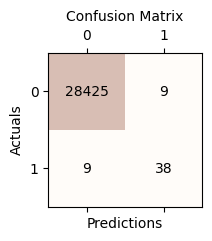

Accuracy: 0.999
Precision: 0.809
Recall: 0.809
F1: 0.809
CPU times: user 2min 10s, sys: 181 ms, total: 2min 10s
Wall time: 2min 10s


In [17]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train_smote, y_train_smote, X_test, y_test,desc="")

### Random Under-Sampling for Imbalanced Dataset

In [18]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=12345)
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))
print("After random under-sampling, the majority category decreased")

[(0, 445), (1, 445)]
After random under-sampling, the majority category decreased


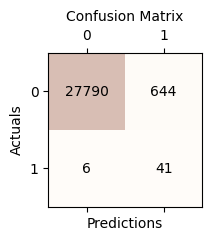

Accuracy: 0.977
Precision: 0.060
Recall: 0.872
F1: 0.112
CPU times: user 324 ms, sys: 120 ms, total: 444 ms
Wall time: 274 ms


In [19]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train_rus, y_train_rus, X_test, y_test,desc="")

### Under-sampling Using NearMiss for Imbalanced Dataset

In [20]:
# Under sample the majority class
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss = nearmiss.fit_resample(X_train,y_train)

# Check the number of records after over sampling
print(sorted(Counter(y_train_nearmiss).items()))
print("After NearMiss Under-sampling, the majority category decreased")

[(0, 363), (1, 445)]
After NearMiss Under-sampling, the majority category decreased


/home/vahid/.cache/pypoetry/virtualenvs/similarity-graph-WKuwPdS3-py3.10/lib/python3.10/site-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


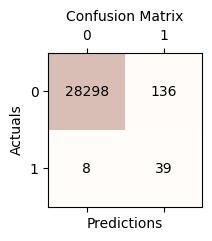

Accuracy: 0.995
Precision: 0.223
Recall: 0.830
F1: 0.351
CPU times: user 397 ms, sys: 152 ms, total: 549 ms
Wall time: 331 ms


In [21]:
%%time
rf_clf = RandomForestClassifier(n_estimators=NUM_ESTIMATOR)
fit_and_predict(rf_clf, X_train_nearmiss, y_train_nearmiss, X_test, y_test,desc="")